In [1]:
import pandas as pd #linear algebra

In [2]:
import numpy as np #data processing

In [24]:
raw_data = pd.read_csv('Desktop/airline/train.csv') #input csv file
raw_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
raw_data.info() #exploring my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
print(raw_data['id'].nunique())

103904


In [26]:
raw_data= raw_data.drop(['Unnamed: 0', 'id'], axis=1) #did not provide any usefull information 

In [27]:
raw_data.shape

(103904, 23)

In [9]:
raw_data.columns #usefull so I can copy paste them later

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [19]:
raw_data.isnull().sum() #checking for missing values

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [28]:
raw_data.fillna(0,inplace=True) #replacing the nulls with zeros
raw_data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [22]:
raw_data['Departure - Arrival'] = abs(raw_data['Departure Delay in Minutes'] -raw_data['Arrival Delay in Minutes'])
#creating a new column with the absolute diffrence between departure and arrival delay. I assumpted the are correlated so I wanted to check that.

In [23]:
raw_data[['Departure Delay in Minutes','Arrival Delay in Minutes','Departure - Arrival']]

,Departure Delay in Minutes,Arrival Delay in Minutes,Departure - Arrival
0,25,18.0,7.0
1,1,6.0,5.0
2,0,0.0,0.0
3,11,9.0,2.0
4,0,0.0,0.0
...,...,...,...
103899,3,0.0,3.0
103900,0,0.0,0.0
103901,7,14.0,7.0
103902,0,0.0,0.0


In [24]:
print(raw_data['Departure - Arrival'].mean()) #5 minutes diffrence by average
print(raw_data['Departure - Arrival'].std())

5.070699876809362
9.593915755771414


In [25]:
raw_data= raw_data.drop(['Departure - Arrival'], axis=1) #I removed again the column 

## Filtering and grouping my data for deeper understanding
## Trying to find insights

In [29]:
raw_data['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

In [89]:
raw_data['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [97]:
raw_data['Arrival Delay in Minutes'].describe()

count    103904.000000
mean         15.133392
std          38.649776
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [109]:
No_delay_arrival = raw_data['Arrival Delay in Minutes'] == 0
raw_data[No_delay_arrival]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Overall satisfaction rate
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,3.714286
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,3.500000
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,3,4,4,4,4,1,0,0.0,neutral or dissatisfied,2.500000
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,4,5,4,4,0.0,satisfied,4.500000
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,2,1,4,1,2,0,0.0,neutral or dissatisfied,2.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,...,4,3,4,2,4,2,0,0.0,neutral or dissatisfied,2.785714
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,2.214286
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,4,0,0.0,satisfied,4.357143
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,2.285714


In [30]:
Business_Class = raw_data['Class'] == 'Business' #Filter for just the bussiness class passengers 

In [ ]:
raw_data[Business_Class] #display only the business class

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
y = raw_data.satisfaction
ydict = {'neutral or dissatisfied':0, 'satisfied':1}
y = y.map(ydict)

In [41]:
a = raw_data.drop(columns='satisfaction')
x = a
x = pd.get_dummies(x, columns=['Gender','Customer Type', 'Type of Travel', 'Class'])

In [32]:
bestfeatures = SelectKBest(score_func=chi2, k=x.columns.size)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns) #concat the two df for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
print(featureScores.nlargest(x.columns.size,'Score'))  

                            Attribute         Score
1                     Flight Distance  7.753602e+06
17           Arrival Delay in Minutes  3.383326e+04
16         Departure Delay in Minutes  2.613488e+04
7                     Online boarding  1.476196e+04
23     Type of Travel_Personal Travel  1.444575e+04
24                     Class_Business  1.376929e+04
25                          Class_Eco  1.163229e+04
0                                 Age  1.134151e+04
9              Inflight entertainment  8.711182e+03
22     Type of Travel_Business travel  6.501444e+03
8                        Seat comfort  6.419260e+03
2               Inflight wifi service  5.422334e+03
10                   On-board service  5.299337e+03
11                   Leg room service  5.261977e+03
15                        Cleanliness  5.071376e+03
21    Customer Type_disloyal Customer  2.989976e+03
13                    Checkin service  2.808445e+03
6                      Food and drink  2.527913e+03
12          

In [33]:
statistical_test = featureScores.nlargest(x.columns.size,'Score')
statistical_test.to_excel('Desktop/airline/statisticaltest.xlsx')

In [26]:
#filtering just the Business class
Business_Class_filter = raw_data['Class'] == 'Business'
Business_Class = raw_data[Business_Class_filter]

In [27]:
y = Business_Class.satisfaction 
ydict = {'neutral or dissatisfied':0, 'satisfied':1}
y = y.map(ydict)

In [28]:
b = Business_Class.drop(columns='satisfaction')
x = b
x = pd.get_dummies(x, columns=['Gender','Customer Type', 'Type of Travel', 'Class'])

In [29]:
bestfeatures = SelectKBest(score_func=chi2, k=x.columns.size)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
print(featureScores.nlargest(x.columns.size,'Score'))  #print the best features


                            Attribute         Score
1                     Flight Distance  8.368600e+05
17           Arrival Delay in Minutes  1.744028e+04
16         Departure Delay in Minutes  1.354599e+04
9              Inflight entertainment  5.467841e+03
7                     Online boarding  5.227695e+03
11                   Leg room service  3.754634e+03
10                   On-board service  3.676391e+03
15                        Cleanliness  3.572493e+03
8                        Seat comfort  3.463656e+03
23     Type of Travel_Personal Travel  3.323130e+03
0                                 Age  3.201202e+03
21    Customer Type_disloyal Customer  3.093844e+03
12                   Baggage handling  2.351565e+03
14                   Inflight service  2.347836e+03
13                    Checkin service  2.231946e+03
6                      Food and drink  1.299487e+03
2               Inflight wifi service  1.164949e+03
20       Customer Type_Loyal Customer  5.379073e+02
4           

In [131]:
Business_flight_filter = raw_data['Type of Travel'] == 'Business travel'
Business_flight = raw_data[Business_flight_filter]

In [132]:
y = Business_flight.satisfaction
ydict = {'neutral or dissatisfied':0, 'satisfied':1}
y = y.map(ydict)

In [133]:
c = Business_flight.drop(columns='satisfaction')
x = c
x = pd.get_dummies(x, columns=['Gender','Customer Type', 'Type of Travel', 'Class'])

In [134]:
bestfeatures = SelectKBest(score_func=chi2, k=x.columns.size)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
print(featureScores.nlargest(x.columns.size,'Score'))  #print the best features

                            Attribute         Score
1                     Flight Distance  3.477287e+06
17           Arrival Delay in Minutes  3.295809e+04
16         Departure Delay in Minutes  2.487074e+04
0                                 Age  1.193023e+04
7                     Online boarding  1.090429e+04
21    Customer Type_disloyal Customer  9.223922e+03
9              Inflight entertainment  8.561424e+03
24                          Class_Eco  6.832935e+03
10                   On-board service  6.517885e+03
8                        Seat comfort  6.395356e+03
15                        Cleanliness  5.686046e+03
11                   Leg room service  4.423504e+03
13                    Checkin service  4.388590e+03
23                     Class_Business  3.699950e+03
20       Customer Type_Loyal Customer  3.284881e+03
2               Inflight wifi service  3.259391e+03
12                   Baggage handling  3.171608e+03
14                   Inflight service  3.148844e+03
6           

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.metrics import accuracy_score

In [67]:
raw_data['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [15]:
from scipy import stats

In [16]:
from scipy.stats import zscore

In [27]:
%matplotlib inline

In [16]:
import statsmodels.api as sm 

In [17]:
from statsmodels.formula.api import ols

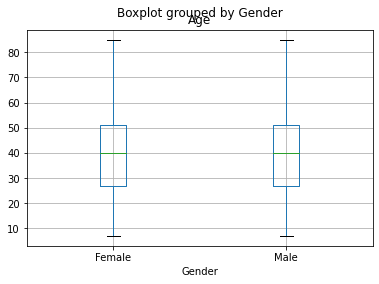

In [18]:
raw_data.boxplot('Age', by='Gender')

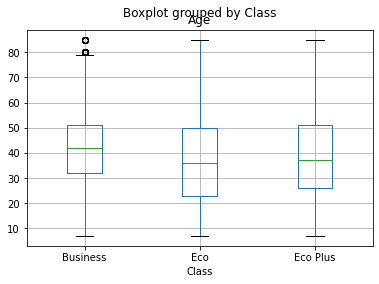

In [54]:
raw_data.boxplot('Age', by='Class')

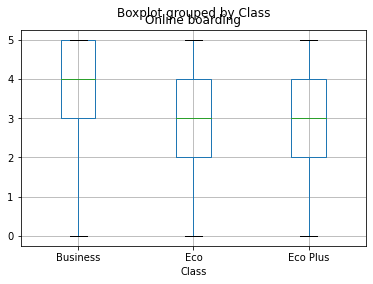

In [59]:
raw_data.boxplot('Online boarding', by='Class')

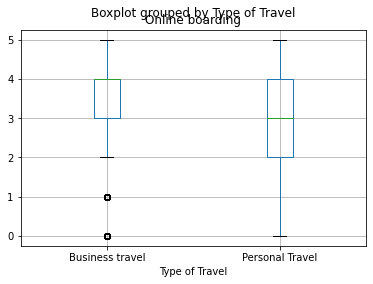

In [61]:
raw_data.boxplot('Online boarding', by='Type of Travel')

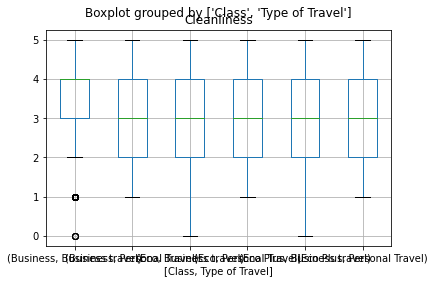

In [69]:
raw_data.boxplot('Cleanliness', by='Class')

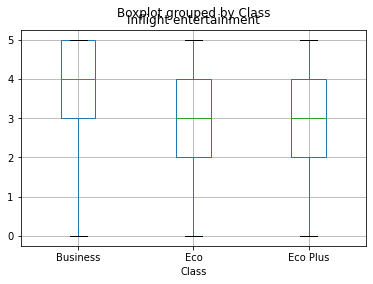

In [70]:
raw_data.boxplot('Inflight entertainment', by='Class')

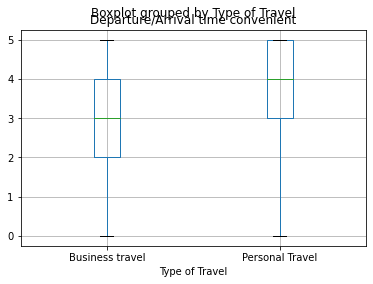

In [88]:
raw_data.boxplot('Departure/Arrival time convenient', by='Type of Travel')

In [140]:
Loyal_filter = raw_data['Customer Type'] == 'Loyal Customer'
loyal = raw_data[~Loyal_filter]

In [141]:
y = loyal.satisfaction
ydict = {'neutral or dissatisfied':0, 'satisfied':1}
y = y.map(ydict)

In [142]:
o = Business_flight.drop(columns='satisfaction')
x = o
x = pd.get_dummies(x, columns=['Gender','Customer Type', 'Type of Travel', 'Class'])

In [60]:
raw_data[raw_data['Class'] == 'Business'][['Type of Travel']].describe() 
#95% from Business class travelled for work purposes

,Type of Travel
count,62160
unique,2
top,Business travel
freq,59487


In [64]:
raw_data.sort_values('Age') #7min 85max

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
47527,Male,Loyal Customer,7,Personal Travel,Eco,925,2,5,2,1,...,3,5,4,2,1,4,3,0,1.0,neutral or dissatisfied
79368,Male,Loyal Customer,7,Personal Travel,Eco Plus,728,3,4,3,3,...,5,1,4,3,3,1,5,0,29.0,neutral or dissatisfied
79379,Female,Loyal Customer,7,Personal Travel,Eco,1092,2,1,2,2,...,2,3,1,2,1,2,2,97,120.0,neutral or dissatisfied
17770,Female,Loyal Customer,7,Personal Travel,Eco,1180,4,4,4,2,...,3,4,2,4,5,5,3,0,0.0,satisfied
47171,Male,disloyal Customer,7,Business travel,Eco,862,3,3,3,3,...,4,3,2,4,2,4,4,0,9.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37790,Female,disloyal Customer,85,Business travel,Business,899,2,2,2,4,...,2,3,4,4,3,3,3,0,0.0,neutral or dissatisfied
15467,Female,disloyal Customer,85,Business travel,Business,101,2,2,2,3,...,1,2,2,2,3,2,3,0,0.0,neutral or dissatisfied
31868,Female,Loyal Customer,85,Business travel,Eco Plus,147,4,4,4,4,...,2,1,3,4,4,1,4,3,0.0,neutral or dissatisfied
19187,Male,Loyal Customer,85,Business travel,Business,3732,3,4,4,4,...,3,3,3,3,3,3,3,1,0.0,neutral or dissatisfied


In [24]:
Distance = raw_data[['Flight Distance']].describe()
Distance = Distance[1:].round(decimals=2)
Distance

,Flight Distance
mean,1189.45
std,997.15
min,31.00
25%,414.00
50%,843.00
75%,1743.00
max,4983.00


In [12]:
raw_data['Class'].value_counts() #which is the most popular class?

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [67]:
raw_data['Gender'].value_counts() #men? women?

Female    65899
Male      63981
Name: Gender, dtype: int64

In [16]:
raw_data['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [29]:
raw_data['satisfaction'].value_counts(normalize = True).round(decimals=3)

neutral or dissatisfied    0.567
satisfied                  0.433
Name: satisfaction, dtype: float64

In [70]:
raw_data['Cleanliness'].value_counts() #just selecting random attributes 

4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64

In [71]:
raw_data['Inflight service'].value_counts()

4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: Inflight service, dtype: int64

In [72]:
raw_data['Class'].value_counts(normalize = True).round(decimals=2)

Business    0.48
Eco         0.45
Eco Plus    0.07
Name: Class, dtype: float64

In [13]:
raw_data['Gender'].value_counts(normalize = True).round(decimals=3)

Female    0.507
Male      0.493
Name: Gender, dtype: float64

In [ ]:
raw_data['Gender'].value_counts(normalize = True).round(decimals=3)

In [19]:
raw_data['Type of Travel'].value_counts(normalize = True).round(decimals=3)

Business travel    0.69
Personal Travel    0.31
Name: Type of Travel, dtype: float64

In [14]:
raw_data['Customer Type'].value_counts(normalize = True).round(decimals=3)

Loyal Customer       0.817
disloyal Customer    0.183
Name: Customer Type, dtype: float64

In [74]:
raw_data['Cleanliness'].value_counts(normalize = True)

4    0.261541
3    0.235902
5    0.218787
2    0.154858
1    0.128804
0    0.000108
Name: Cleanliness, dtype: float64

In [75]:
raw_data['Cleanliness'].mean()

3.286325839236218

In [76]:
raw_data.groupby('Gender').mean()['Age'].round(decimals=2)

Gender
Female    39.29
Male      39.57
Name: Age, dtype: float64

In [77]:
raw_data.groupby('Gender').mean()[['Age','Ease of Online booking']]

,Age,Ease of Online booking
Gender,,
Female,39.293935,2.748737
Male,39.565996,2.765258


In [78]:
raw_data.groupby(['Gender','Class']).mean()[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']].round(decimals=2)

Inflight wifi service  Departure/Arrival time convenient  \
Gender Class                                                                
Female Business                   2.77                               2.91   
       Eco                        2.66                               3.17   
       Eco Plus                   2.74                               3.15   
Male   Business                   2.78                               2.91   
       Eco                        2.69                               3.22   
       Eco Plus                   2.78                               3.27   

                 Ease of Online booking  Gate location  Food and drink  \
Gender Class                                                             
Female Business                    2.91           2.99            3.32   
       Eco                         2.59           2.97            3.09   
       Eco Plus                    2.64           2.98            3.10   
Male   Business                    2.92           2.98            3.34   
       Eco                         2.61           2.97            3.08   
       Eco Plus                    2.69           2.96            3.12   

                 Online boarding  Seat comfort  Inflight entertainment  \
Gender Class                                                             
Female Business             3.71          3.76                    3.64   
       Eco                  2.95          3.23                    3.09   
       Eco Plus             2.98          3.24                    3.11   
Male   Business             3.73          3.77                    3.64   
       Eco                  2.68          3.05                    3.10   
       Eco Plus             2.78          3.09                    3.13   

                 On-board service  Leg room service  Baggage handling  \
Gender Class                                                            
Female Business              3.68              3.65              3.85   
       Eco                   3.10              3.01              3.37   
       Eco Plus              3.06              3.00              3.28   
Male   Business              3.68              3.64              3.84   
       Eco                   3.14              3.17              3.53   
       Eco Plus              3.01              3.12              3.43   

                 Checkin service  Inflight service  Cleanliness  
Gender Class                                                     
Female Business             3.52              3.85         3.47  
       Eco                  3.11              3.38         3.11  
       Eco Plus             3.03              3.31         3.11  
Male   Business             3.52              3.84         3.49  
       Eco                  3.14              3.56         3.10  
       Eco Plus             3.00              3.47         3.13

In [88]:
satisfied = raw_data['satisfaction']=='satisfied'

In [89]:
raw_data[satisfied]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
13,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,...,4,4,5,2,2,2,4,0,0.0,satisfied
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25956,Female,Loyal Customer,29,Business travel,Business,2864,5,5,5,5,...,3,5,5,5,3,5,3,0,0.0,satisfied
25961,Male,Loyal Customer,51,Business travel,Business,2296,3,3,3,3,...,5,5,5,5,3,5,3,2,0.0,satisfied
25969,Male,Loyal Customer,52,Business travel,Business,280,3,3,3,3,...,4,4,4,4,3,4,3,0,0.0,satisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied


In [90]:
raw_data.describe()[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
quality_variables = raw_data.describe()[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

In [14]:
quality_variables[1:]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
mean,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
quality_variables.to_excel('Desktop/airline/rating.xlsx')

In [58]:
quality_var = raw_data[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

In [60]:
quality_var_corr = quality_var.corr(method='pearson')
quality_var_corr

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Inflight wifi service,1.000000,0.987940,0.999626,0.993799,0.976587,0.971751,-0.339241,0.137446,0.096884,0.124955,-0.612455,0.549780,-0.894445,0.966511
Departure/Arrival time convenient,0.987940,1.000000,0.991255,0.996778,0.995955,0.994541,-0.312473,0.210802,0.171558,0.197853,-0.689008,0.533702,-0.901902,0.991677
Ease of Online booking,0.999626,0.991255,1.000000,0.994986,0.979981,0.975645,-0.332896,0.152660,0.112049,0.140053,-0.632521,0.543763,-0.899022,0.970509
Gate location,0.993799,0.996778,0.994986,1.000000,0.994165,0.991534,-0.334117,0.168175,0.129166,0.155493,-0.630876,0.558249,-0.891683,0.988804
Food and drink,0.976587,0.995955,0.979981,0.994165,1.000000,0.999751,-0.317287,0.210531,0.173083,0.197696,-0.665304,0.549295,-0.885270,0.999073
Online boarding,0.971751,0.994541,0.975645,0.991534,0.999751,1.000000,-0.312738,0.220015,0.182899,0.207158,-0.673366,0.545750,-0.883289,0.999698
Seat comfort,-0.339241,-0.312473,-0.332896,-0.334117,-0.317287,-0.312738,1.000000,0.612516,0.628915,0.619012,0.036932,-0.906608,0.341245,-0.312589
Inflight entertainment,0.137446,0.210802,0.152660,0.168175,0.210531,0.220015,0.612516,1.000000,0.999035,0.999900,-0.509274,-0.558054,-0.298708,0.221311
On-board service,0.096884,0.171558,0.112049,0.129166,0.173083,0.182899,0.628915,0.999035,1.000000,0.999485,-0.479601,-0.580657,-0.261499,0.184756
Leg room service,0.124955,0.197853,0.140053,0.155493,0.197696,0.207158,0.619012,0.999900,0.999485,1.000000,-0.498445,-0.567164,-0.287215,0.208498


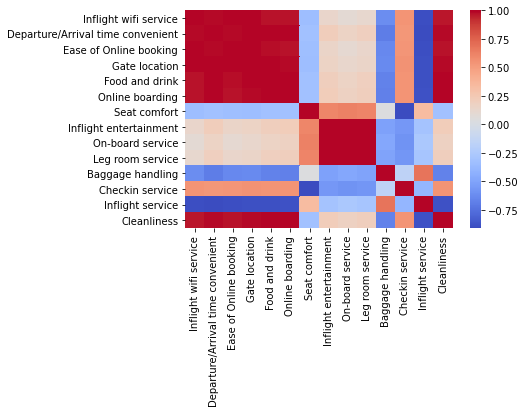

In [71]:
sn.heatmap(quality_var_corr, cmap='coolwarm')

In [96]:
quality_variables.iloc[1:3]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682


In [97]:
quality_variables_mean_std = quality_variables.iloc[1:3].round(decimals=2)

In [98]:
quality_variables_mean_std

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
mean,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29
std,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31


In [99]:
quality_variables_mean_std.idxmax(axis=1)

mean                     Inflight service
std     Departure/Arrival time convenient
dtype: object

In [100]:
quality_variables_mean_std.max(axis=1)

mean    3.64
std     1.53
dtype: float64

In [78]:
Loyal_Customers = raw_data['Customer Type']=='Loyal Customer' 
#filtering Loyal customers

In [62]:
raw_data['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [81]:
raw_data['Customer Type'].value_counts(normalize = True).round(decimals=2) 

Loyal Customer       0.82
disloyal Customer    0.18
Name: Customer Type, dtype: float64

In [82]:
raw_data[Loyal_Customers].groupby('satisfaction').size()

satisfaction
neutral or dissatisfied    44390
satisfied                  40533
dtype: int64

In [83]:
raw_data[Loyal_Customers].groupby('satisfaction').size().add_prefix('Loyal Customers: ')

satisfaction
Loyal Customers: neutral or dissatisfied    44390
Loyal Customers: satisfied                  40533
dtype: int64

In [84]:
Loyal_Satisfied_Customers =(raw_data['Customer Type']=='Loyal Customer') & (raw_data['satisfaction']=='satisfied')

In [85]:
raw_data[~Loyal_Customers].groupby('satisfaction').size().add_prefix('Disloyal Customers: ')

satisfaction
Disloyal Customers: neutral or dissatisfied    14489
Disloyal Customers: satisfied                   4492
dtype: int64

In [ ]:
#Hypothesis: The loyal customers should be satisfied in a higher percentage than the disloyal customers. 
#True: On loyal customers 47.72% are satisfied while in the disloyal only 23.66% are satisfied.

In [77]:
raw_data.corr(method='pearson').round(decimals=2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Departure delay - Arrival delay,Overall satisfaction rate
Age,1.00,0.10,0.02,0.04,0.02,-0.00,0.02,0.21,0.16,0.08,0.06,0.04,-0.05,0.04,-0.05,0.05,-0.01,-0.01,-0.01,0.09
Flight Distance,0.10,1.00,0.01,-0.02,0.07,0.00,0.06,0.21,0.16,0.13,0.11,0.13,0.06,0.07,0.06,0.09,0.00,-0.00,0.03,0.16
Inflight wifi service,0.02,0.01,1.00,0.34,0.72,0.34,0.13,0.46,0.12,0.21,0.12,0.16,0.12,0.04,0.11,0.13,-0.02,-0.02,-0.02,0.58
Departure/Arrival time convenient,0.04,-0.02,0.34,1.00,0.44,0.44,0.00,0.07,0.01,-0.00,0.07,0.01,0.07,0.09,0.07,0.01,0.00,-0.00,0.00,0.40
Ease of Online booking,0.02,0.07,0.72,0.44,1.00,0.46,0.03,0.40,0.03,0.05,0.04,0.11,0.04,0.01,0.04,0.02,-0.01,-0.01,-0.00,0.50
Gate location,-0.00,0.00,0.34,0.44,0.46,1.00,-0.00,0.00,0.00,0.00,-0.03,-0.01,0.00,-0.04,0.00,-0.00,0.01,0.01,0.00,0.32
Food and drink,0.02,0.06,0.13,0.00,0.03,-0.00,1.00,0.23,0.57,0.62,0.06,0.03,0.03,0.09,0.03,0.66,-0.03,-0.03,-0.02,0.50
Online boarding,0.21,0.21,0.46,0.07,0.40,0.00,0.23,1.00,0.42,0.29,0.16,0.12,0.08,0.20,0.07,0.33,-0.02,-0.02,-0.02,0.55
Seat comfort,0.16,0.16,0.12,0.01,0.03,0.00,0.57,0.42,1.00,0.61,0.13,0.11,0.07,0.19,0.07,0.68,-0.03,-0.03,-0.02,0.57
Inflight entertainment,0.08,0.13,0.21,-0.00,0.05,0.00,0.62,0.29,0.61,1.00,0.42,0.30,0.38,0.12,0.40,0.69,-0.03,-0.03,-0.02,0.71


In [51]:
raw_data.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029735
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030597


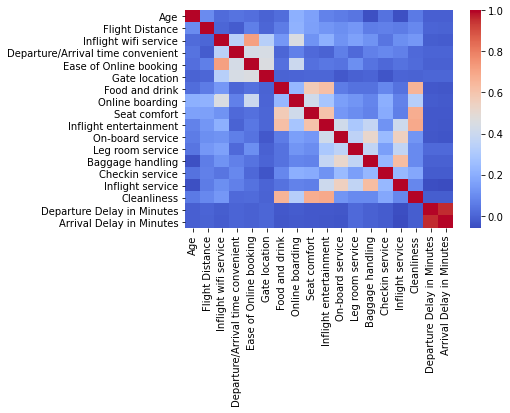

In [70]:
correlation = raw_data.corr()
sn.heatmap(correlation, cmap='coolwarm')

In [45]:
import seaborn as sn

In [32]:
rated_variables = raw_data[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

In [35]:
rated_variables

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [63]:
short_haul_flight = raw_data.sort_values('Flight Distance').head(47978)

In [64]:
y = short_haul_flight.satisfaction
ydict = {'neutral or dissatisfied':0, 'satisfied':1}
y = y.map(ydict)

In [65]:
c = short_haul_flight.drop(columns='satisfaction')
x = c
x = pd.get_dummies(x, columns=['Gender','Customer Type', 'Type of Travel', 'Class'])

In [66]:
bestfeatures = SelectKBest(score_func=chi2, k=x.columns.size)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
print(featureScores.nlargest(x.columns.size,'Score'))  #print the best features

                            Attribute         Score
17           Arrival Delay in Minutes  16801.948367
16         Departure Delay in Minutes  14585.155993
7                     Online boarding   5559.238318
24                     Class_Business   5160.925529
23     Type of Travel_Personal Travel   4598.411788
2               Inflight wifi service   3623.521126
0                                 Age   3284.747216
22     Type of Travel_Business travel   2970.116540
9              Inflight entertainment   2755.214378
25                          Class_Eco   2327.177631
8                        Seat comfort   1680.276848
1                     Flight Distance   1612.623114
10                   On-board service   1404.309109
11                   Leg room service   1388.074969
15                        Cleanliness   1387.474195
4              Ease of Online booking   1266.112321
6                      Food and drink    767.149026
13                    Checkin service    585.505670
21    Custom

In [1]:
pwd

'C:\\Users\\user'